<a href="https://colab.research.google.com/github/Eduard25/Galaxias/blob/main/DataVisualization1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pip uninstall tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.15.0


In [6]:
%pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf
print(tf.__version__)

import keras
print(keras.__version__)

2.16.1
3.3.3


In [16]:
!fusermount -u /content/drive

fusermount: failed to unmount /content/drive: Device or resource busy


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
cd /content/gdrive/MyDrive/ClasificadorGalaxias/Entrenado1.h5

/content/gdrive/MyDrive


In [14]:
ls

MyDrive/


In [4]:
# Cargar el modelo entrenado desde el archivo .h5
model = load_model('/content/gdrive/MyDrive/ClasificadorGalaxias/Entrenado1.h5')


In [5]:
def preprocess_image(img_path, target_size):
    img = image.load_img('/content/gdrive/MyDrive/ClasificadorGalaxias/Imagenes/harvardgal1.jpg', target_size=(69,69))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalizar los píxeles de la imagen al rango [0, 1]
    return img_array


In [6]:
def classify_image(model, img_array, class_labels):
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return class_labels[predicted_class[0]], predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
La imagen se clasifica como: Disk, Edge-on, No Bulge
Predicciones completas: [[8.8930782e-03 2.5392044e-03 5.0077506e-04 9.4999409e-01 9.9964023e-01
  9.9826610e-01 9.9998832e-01 3.1253144e-02 1.1307137e-03 6.9552767e-01]]


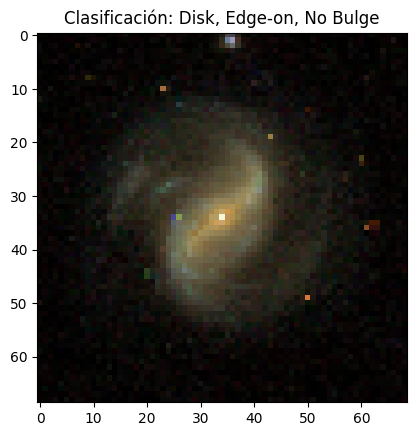

In [7]:
# Definir el tamaño de la imagen y las etiquetas de las clases
target_size = (69, 69)  # Ajusta este tamaño según el tamaño de las imágenes de entrenamiento
class_labels = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round',
                'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge',
                'Disk, Edge-on, No Bulge', 'Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral',
                'Disk, Face-on, Loose Spiral']  # Reemplaza con las etiquetas de tus clases

# Ruta de la imagen que deseas clasificar
img_path = '/content/gdrive/MyDrive/ClasificadorGalaxias/Imagenes/harvardgal1.jpg'

# Preprocesar la imagen
img_array = preprocess_image('/content/gdrive/MyDrive/ClasificadorGalaxias/Imagenes/harvardgal1.jpg', target_size)

# Realizar la predicción
predicted_class, predictions = classify_image(model, img_array, class_labels)

# Imprimir el resultado
print(f"La imagen se clasifica como: {predicted_class}")
print(f"Predicciones completas: {predictions}")

# Opcional: Mostrar la imagen
img = image.load_img(img_path, target_size=target_size)
plt.imshow(img)
plt.title(f"Clasificación: {predicted_class}")
plt.show()
